In [ ]:
# Install OpenCV if not already installed
# !pip install opencv-python-headless

# Download Caffe model files for DNN face detection
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830//res10_300x300_ssd_iter_140000.caffemodel

Saving happy-male-and-female-business-people-talking-while-standing-in-office-MASF16839.jpg to happy-male-and-female-business-people-talking-while-standing-in-office-MASF16839 (1).jpg
Detected 4 face(s).
Uploaded image with detected faces:


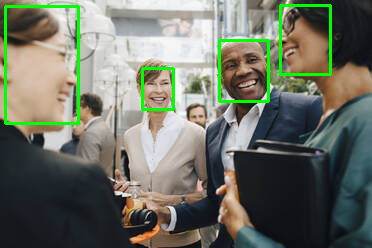

Face 1:


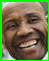

Face 2:


Face 3:


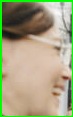

Face 4:


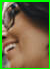

All detected faces have been saved in the 'faces' folder.


In [ ]:
import cv2
import os
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload an image
uploaded = files.upload()
img_path = next(iter(uploaded))  # Get the uploaded file name

# Create 'faces' directory if it doesn't exist
faces_dir = 'faces'
os.makedirs(faces_dir, exist_ok=True)

# Load the image
image = cv2.imread(img_path)
if image is None:
    raise ValueError(f"Could not load image {img_path}")
(h, w) = image.shape[:2]

# Loading OpenCV DNN face detector
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel") # deploy.prototxt is a in Caffe’s “prototxt” format that describes the layer-by-layer structure of the network

# Convert image to blob
blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))  # Mean subtraction for normalization

# Forward pass and processing
net.setInput(blob)
detections = net.forward()

# Parse detections into a faces list
faces = []
confidence_threshold = 0.6

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * [w, h, w, h]
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        # Append as (x, y, w, h)
        faces.append((startX, startY, endX - startX, endY - startY))

print(f"Detected {len(faces)} face(s).")

# Draw rectangles on the original image for visualization
image_with_boxes = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the uploaded image with detected faces
print("Uploaded image with detected faces:")
cv2_imshow(image_with_boxes)  # Works in Colab[4][3]

# Iterate and save each face, and display them
for idx, (x, y, w, h) in enumerate(faces):
    face_crop = image[y:y+h, x:x+w]
    face_filename = os.path.join(faces_dir, f'face_{idx+1}.jpg')
    cv2.imwrite(face_filename, face_crop)
    print(f"Face {idx+1}:")
    cv2_imshow(face_crop)

print("All detected faces have been saved in the 'faces' folder.")
